# 估算树叶的面积

In [71]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [120]:
img = cv2.imread('leaf.png')
img.shape

(660, 792, 3)

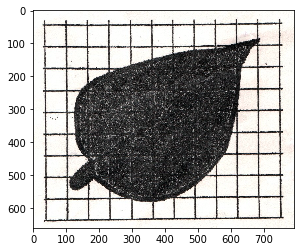

In [121]:
plt.imshow(img)

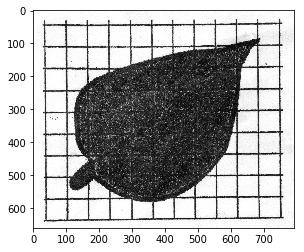

In [94]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.normalize(gray, gray, 0, 255, cv2.NORM_MINMAX)
plt.imshow(gray, cmap = 'gray')

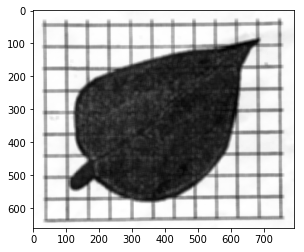

In [143]:
blur = cv2.GaussianBlur(gray, (11, 11), 11)
plt.imshow(blur, cmap = 'gray')

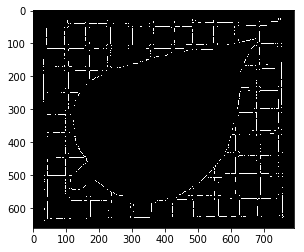

In [145]:
canny = cv2.Canny(blur, 100, 200, 3)
plt.imshow(canny, cmap = 'gray') #, interpolation='bicubic')

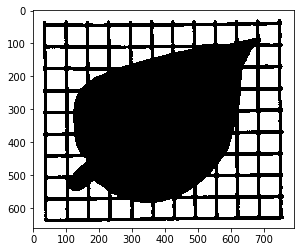

In [150]:
ret, bin = cv2.threshold(blur, 200, 240, cv2.THRESH_BINARY)
plt.imshow(bin, cmap = 'gray') #, interpolation='bicubic')

67


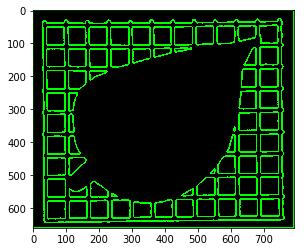

In [151]:
#contours, hierarchy = cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv2.findContours(bin,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
contours0 = contours
print(len(contours))
imgc = np.zeros_like(img)
cv2.drawContours(imgc, contours, -1, (0,255,0), 3)
plt.imshow(imgc, cmap = 'gray')

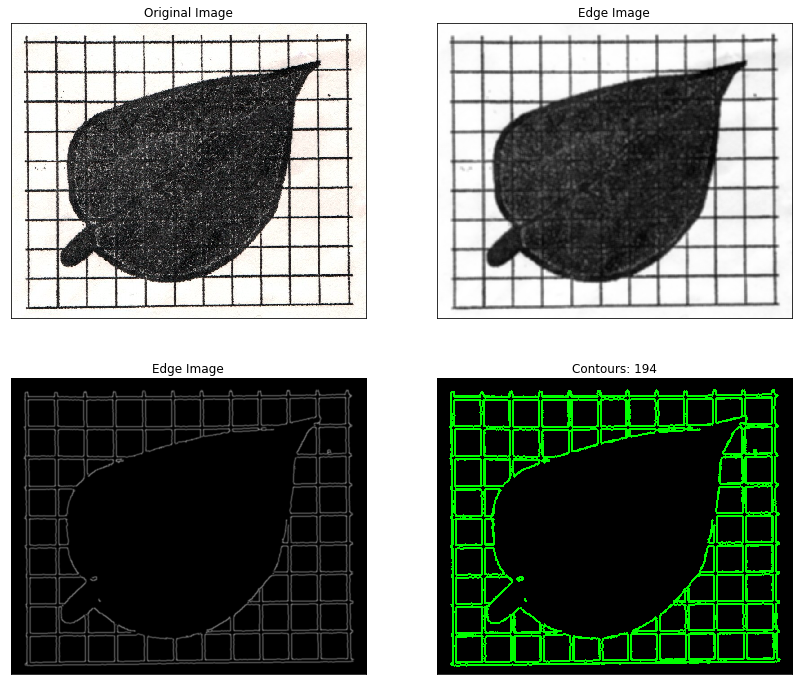

In [2]:

#contours, hierarchy = cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv2.findContours(edges,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
contours0 = contours
imgc = np.zeros_like(img)
cv2.drawContours(imgc, contours, -1, (0,255,0), 3)

plt.figure(figsize=(14,12))
plt.subplot(2,2,1), plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2), plt.imshow(gray2, cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,3), plt.imshow(edges, cmap = 'gray', interpolation='bicubic')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,4), plt.imshow(imgc, cmap = 'gray')
plt.title('Contours: %d' % len(contours)), plt.xticks([]), plt.yticks([])

plt.show()

In [152]:
def cnt_area(cnt):
  area = cv2.contourArea(cnt)
  return area

In [155]:
contours.sort(key = cnt_area, reverse=True)
areas = list(map(cnt_area, contours))
maxarea = areas[5]
halfarea = maxarea / 2
maxarea

3023.0

In [156]:
areas

[521269.0,
 436086.5,
 3100.5,
 3041.0,
 3029.0,
 3023.0,
 2981.5,
 2971.5,
 2970.5,
 2969.5,
 2968.0,
 2957.5,
 2948.5,
 2932.5,
 2922.0,
 2919.0,
 2918.5,
 2915.0,
 2904.0,
 2899.0,
 2899.0,
 2895.0,
 2888.0,
 2886.0,
 2872.0,
 2868.0,
 2867.0,
 2866.5,
 2864.0,
 2854.5,
 2854.0,
 2852.5,
 2851.0,
 2848.5,
 2826.5,
 2815.0,
 2805.5,
 2801.0,
 2800.0,
 2796.5,
 2789.0,
 2780.0,
 2779.0,
 2721.0,
 2596.5,
 2558.0,
 2506.0,
 2501.5,
 2399.0,
 2336.5,
 2217.0,
 1930.5,
 1836.0,
 1759.5,
 1220.0,
 1205.5,
 1071.0,
 1063.5,
 997.0,
 779.0,
 765.0,
 721.5,
 403.0,
 325.5,
 116.5,
 84.5,
 33.5]

In [157]:
bigcells = sum(list(map(lambda x: 1 if x > halfarea else 0, areas)))
bigcells

54

In [158]:
leafarea = 11 * 9 - bigcells
leafarea

45

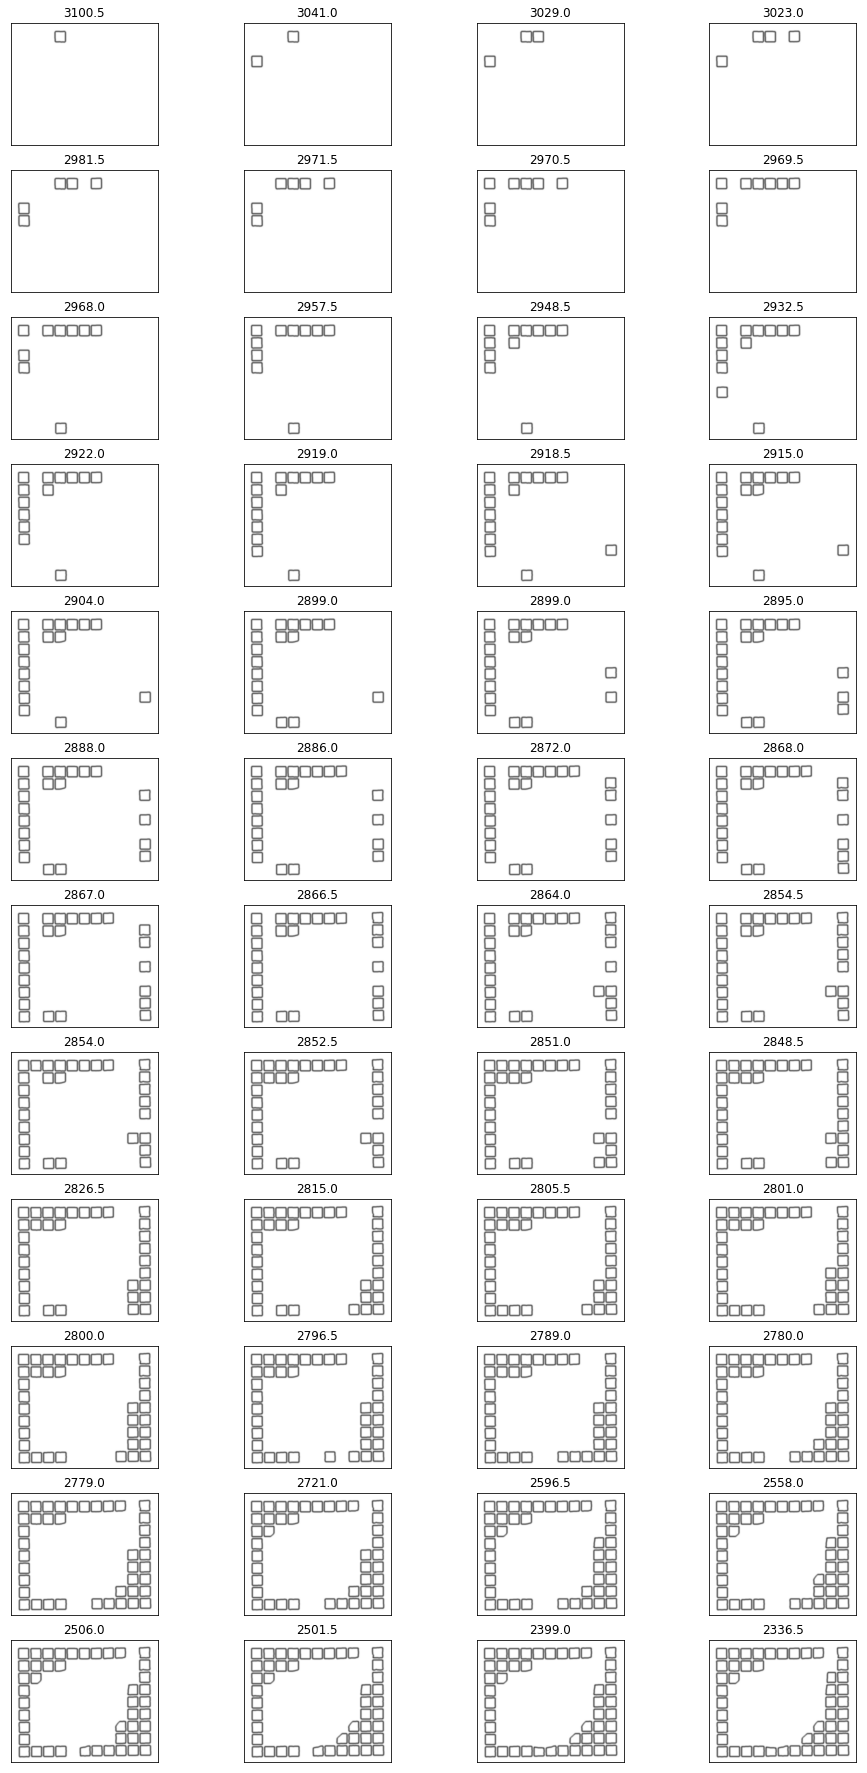

In [161]:
plt.figure(figsize=(16,32))
total = 48
ncols = 4
nrows = (total + ncols - 1) // ncols
index = 0
imgt = np.full_like(img, 255)
for i in range(len(contours0)):
    area = cv2.contourArea(contours[i])
    if area < halfarea or area > maxarea * 2:
        continue
    cv2.drawContours(imgt, contours0, i, (0,0,0), 3)
    index += 1
    plt.subplot(nrows, ncols, index)
    plt.imshow(imgt, interpolation='bicubic')
    plt.title(area), plt.xticks([]), plt.yticks([])
    if index == total:
        break

plt.show()

### 连通域

In [162]:
num, labels, stats, centroids = cv2.connectedComponentsWithStats(bin, connectivity=8, ltype=None)

In [163]:
num

67

In [164]:
labels

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ..., 
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)

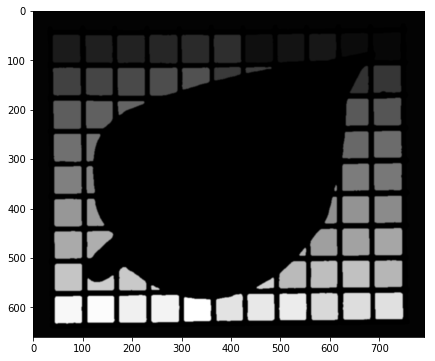

In [165]:
plt.figure(figsize=(9,6))
plt.imshow(labels, cmap = 'gray', interpolation='bicubic')  

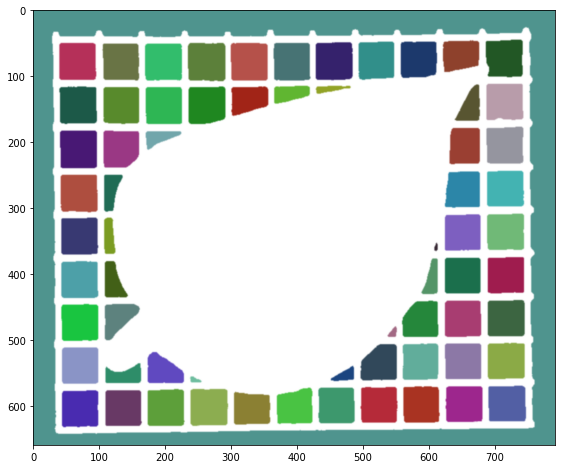

In [178]:
output = np.full_like(img, 255)
for i in range(1, num):
    mask = labels == i
    output[:, :, 0][mask] = np.random.randint(20, 200)
    output[:, :, 1][mask] = np.random.randint(20, 200)
    output[:, :, 2][mask] = np.random.randint(20, 200)
plt.figure(figsize=(10, 8))
plt.imshow(output, interpolation='bicubic')  

In [167]:
stats

array([[    29,     26,    732,    617, 275790],
       [     0,      0,    792,    660,  88005],
       [   687,     45,     56,     57,   2972],
       [   622,     46,     55,     48,   2309],
       [   429,     49,     56,     58,   3129],
       [   494,     48,     54,     58,   2991],
       [   558,     48,     55,     55,   2881],
       [    40,     50,     56,     56,   3077],
       [   105,     51,     56,     56,   2959],
       [   170,     51,     56,     56,   3078],
       [   235,     50,     57,     58,   3208],
       [   300,     50,     56,     57,   3136],
       [   365,     50,     56,     57,   3076],
       [   640,    113,     38,     55,   1294],
       [   688,    112,     56,     55,   2978],
       [   366,    115,     54,     27,   1134],
       [   429,    115,     53,     12,    382],
       [    40,    116,     57,     57,   3064],
       [   107,    117,     54,     56,   2956],
       [   171,    117,     55,     56,   3055],
       [   236,    1

In [174]:
areas = stats.T[4]
np.median(areas)

2954.0

In [175]:
areas.sort()
areas

array([    47,    105,    138,    382,    448,    786,    831,    846,
         1070,   1134,   1149,   1281,   1294,   1841,   1917,   2018,
         2309,   2431,   2496,   2594,   2604,   2652,   2697,   2819,
         2881,   2883,   2892,   2899,   2904,   2904,   2909,   2918,
         2931,   2954,   2955,   2956,   2959,   2959,   2968,   2972,
         2972,   2973,   2978,   2991,   2994,   3000,   3004,   3004,
         3009,   3019,   3024,   3024,   3028,   3038,   3055,   3064,
         3074,   3076,   3077,   3078,   3088,   3129,   3136,   3149,
         3208,  88005, 275790], dtype=int32)

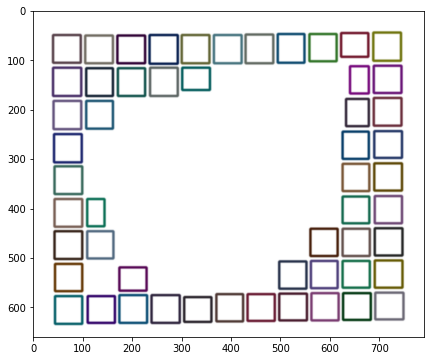

In [176]:
output = np.full_like(img, 255)
for i in range(1, num):
    x, y, w, h, area1 = stats[i]
    area = w * h
    if area > 4000 or area < 1800 or w > 70 or h > 70:
        continue
    #print(x, y, w, h, area)
    r = np.random.randint(0, 128)
    g = np.random.randint(0, 128)
    b = np.random.randint(0, 128)
    cv2.rectangle(output,(x,y),(x+w,y+h),(r, g, b),3)
plt.figure(figsize=(9,6))
plt.imshow(output, interpolation='bicubic')  